<a href="https://colab.research.google.com/github/nanmaharaj/my-deeplearning-projects/blob/main/GPU_bench_marking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(X_train, y_train), (X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 1)

In [13]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_train[0]

array([6], dtype=uint8)

In [5]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

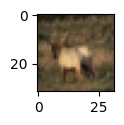

In [16]:
plot_sample(3)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
classes[y_train[3][0]]

'deer'

# SCALING

In [20]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [23]:
#One hot encoding

y_train_categorical=keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [24]:
y_test_categorical=keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#categorical_crossentropy is used since we one hot encoded our labels

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8135 - accuracy: 0.3551
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6207 - accuracy: 0.4276
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5396 - accuracy: 0.4579
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4815 - accuracy: 0.4750
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4307 - accuracy: 0.4938
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3882 - accuracy: 0.5101
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3483 - accuracy: 0.5240
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3146 - accuracy: 0.5364
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2840 - accuracy: 0.5491
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.25

In [26]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 1s 3ms/step


'cat'

In [27]:
classes[y_test[0][0]]

'cat'

In [28]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 5ms/step - loss: 1.5667 - accuracy: 0.5682


[1.5666518211364746, 0.5681999921798706]

In [29]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
  ])

  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [30]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 141s 90ms/step - loss: 1.8157 - accuracy: 0.3542
2min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [31]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8172 - accuracy: 0.3537
13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
